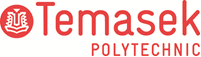

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Shanza Eiliyah Binte Mohamed Sahrom
* Tutorial Group                :  PC05
* Tutor						    :  Mr Kian Eng Ong
* Submission Date               : 10/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Business Understanding
Healthcare and insurance providers need to estimate medical costs accurately so they can set fair insurance charges, manage risk, and plan their resources properly. However, medical expenses can differ a lot from person to person because they depend on personal factors such as age, lifestyle, and healt . This makes cost prediction difficult and uncertain if done using simple rules.

The objective of my project is to build a machine learning model that predicts individual medical insurance charges using features like age, BMI, smoking status, and number of dependents. This creates a simple and data-driven tool to help estimate medical charges for pricing and planning purposes.

The goal of this solution is to achieve low prediction error, such as a low Mean Absolute Error, so that the predicted charges are close to the real values. Higher accuracy can lead to fairer charges, better risk planning for insurance providers, and clearer cost expectations for users.

# 2. Data Understanding

Dataset: 
I used the Medical Insurance Charges dataset from Kaggle, which contains historical records of individuals together with their medical insurance charges. The dataset has over 1,300 samples and several structured features, which makes it suitable for training and evaluating supervised machine learning models.


Target Variable: 
The target variable in my project is charges, which represents the total medical insurance cost for each individual. Because charges is a continuous numerical value, I treat this as a regression problem where the goal is to predict a real number rather than classify data into categories.


Features: 

1. Age: Represents the age

2. Sex: Indicates gender

3. BMI (Body Mass Index): A health detail indicator related to obesity and related medical conditions.

4. Number of Children: For families and healthcare responsibility

5. Smoking Status: A habit that usually increases risk of bad health diagnosis

6. Region: Provides geographical context, which may reflect differences in healthcare access or pricing structures. 

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("medical-charges.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#DATASET SIZE AND COLUMNS
print("Rows, Columns:", df.shape)
print("\nColumns:", df.columns.tolist())

Rows, Columns: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


The dataset contains 1,338 rows and 7 columns. Having multiple predictor variables allows my model to learn patterns from different types of features. The target variable is charges, while the other six columns are used as input features for prediction.

In [4]:
#DATA TYPES
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 None)

The dataset has a mix of number and category features, and I found no missing values in the data. This allows me to focus more on feature preparation and model performance instead of spending a lot of time on data cleaning.


In [5]:
#MISSING VALUE CHECK
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

Machine learning models cannot work with missing values unless I first fill them in or remove them. I checked the dataset for missing values to make sure the data is clean and ready for training. No missing values were found, so imputation is not required. This means the dataset is complete and I do not need to remove any rows or fill in any values.

In [6]:
#DUPLICATE ROW CHECK
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 1


Duplicate records can bias the model because they cause some data points to be counted more than once. I checked for duplicates as part of basic data cleaning before building the model and found one duplicate record in the dataset. This is a problem because repeated rows can give extra importance to certain examples and affect how the model learns. I removed the duplicate row so that every record is unique and each data point has equal influence during training and evaluation of the model.

In [7]:
#REMOVE DUPLICATE ROW
df = df.drop_duplicates().reset_index(drop=True)
print("Rows after removing duplicates:", df.shape)

Rows after removing duplicates: (1337, 7)


I removed the duplicate record to prevent bias during model training 

In [8]:
#SUMMARY STATISTICS
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


The summary statistics show that medical charges vary a lot, from about 1,100 to over 63,000, with an average of around 13,270. The wide range and large spread show that costs are very different between people. This means there are a few very high cost cases compared to most people, which shows that the data is right skewed.


In [9]:
#CATEGORICAL FEATURE DISTRIBUTION
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 sex
sex
male      675
female    662
Name: count, dtype: int64

 smoker
smoker
no     1063
yes     274
Name: count, dtype: int64

 region
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


The category counts show that gender is almost balanced, with around 676 males and 662 females, and the regions are also fairly balanced across the four groups. However, smoking status is not balanced, with many more non-smokers than smokers. This matches real-life patterns and shows that smoking is an important factor when predicting medical charges.

In [10]:
# DEFINE FEATURES AND TARGET VARIABLE
target = "charges"
X = df.drop(columns=[target])
y = df[target]

print("Target:", target)
print("X shape:", X.shape)
print("y shape:", y.shape)

Target: charges
X shape: (1337, 6)
y shape: (1337,)


I split the dataset into input features (X) and the target variable (y). X has the shape (1338, 6), which means I am using six input features for 1,338 records, and y has the shape (1338,), which contains the medical charges I want to predict. This clear separation sets up the problem correctly for supervised learning and helps avoid mixing the inputs with the target. This is important because separating the features and the target clearly defines what the model is learning to predict and helps keep the training process clean and reliable.

In [11]:
#DISPLAY TARGET VARIABLE INFORMATION
print("Target dtype:", y.dtype)
print("Example target values:", y.head().tolist())

Target dtype: float64
Example target values: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


The target variable charges is a continuous number, which confirms that this is a regression problem. This means I should use regression models such as Linear Regression, Decision Tree Regressor, or Random Forest Regressor, and evaluate the model using regression metrics like MAE and RMSE.

Overall, the dataset is clean, large enough, and has no missing values, so it is suitable for supervised regression modelling. The mix of number and category features gives useful inputs for predicting medical charges, and the wide spread in charges shows that I need strong models and careful evaluation.